### **UTS REGRESSION LINIER USING CALIFORNIA HOUSE PRICES**


**Nama: Nadhifi Qurrunul B F H**

**Nim: 1103204156**

**Dataset**: [California House Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

**Model: Linier Regression**


In [106]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Output:**
**Import Library:** Pada langkah ini, library yang diperlukan untuk analisis data dan pembuatan model machine learning diimpor. Beberapa library utama yang digunakan meliputi Pandas (manipulasi data), NumPy (komputasi numerik), Matplotlib dan Seaborn (visualisasi data), serta Scikit-Learn (pembuatan model machine learning).

**Mount Google Drive:** Ini adalah langkah yang umum dilakukan pada Google Colab untuk mengakses file atau data yang disimpan di Google Drive. Fungsi drive.mount('/content/drive') digunakan untuk menghubungkan Google Colab dengan Google Drive dan memungkinkan akses ke file yang ada di dalamnya.

In [107]:
# # Baca dataset dari Google Drive
file_path = '/content/drive/MyDrive/Machine Learning/Datasets/california_housing.csv'


In [108]:
# Read the CSV file into a Pandas DataFrame
housing = pd.read_csv(file_path)

In [109]:
# Display the DataFrame
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# **EDA**

EDA atau Exploratory Data Analysis (Analisis Data Eksploratif) adalah suatu pendekatan untuk menganalisis dan merangkum karakteristik utama dari dataset secara visual dan deskriptif. Tujuan dari EDA adalah untuk memahami struktur dataset, mengidentifikasi pola, melihat hubungan antar variabel, dan menemukan wawasan yang dapat membimbing analisis lebih lanjut.

In [110]:
# Tampilkan informasi dataset
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [111]:
# Tampilkan statistik describe
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


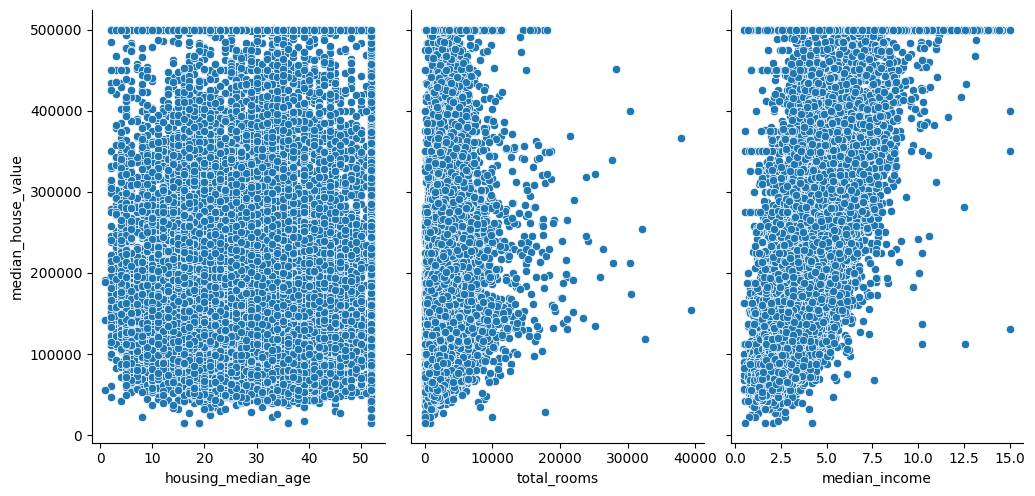

In [112]:
# Visualisasi hubungan antara beberapa fitur dengan harga rumah
sns.pairplot(housing, x_vars=['housing_median_age', 'total_rooms', 'median_income'], y_vars='median_house_value', height=5, aspect=0.7)
plt.show()

**Output:**
1. **Hubungan antara 'housing_median_age' dan 'median_house_value':**
   - Terlihat ada variasi yang cukup besar dalam harga rumah untuk setiap kategori umur hunian.
   - Tidak terlihat pola linier yang jelas, tetapi beberapa kategori umur hunian cenderung memiliki kisaran harga tertentu.

2. **Hubungan antara 'total_rooms' dan 'median_house_value':**
   - Terlihat ada beberapa titik di mana jumlah total ruangan cukup tinggi, tetapi harga rumah tidak selalu meningkat secara linier. Hal ini mungkin menunjukkan adanya faktor-faktor lain yang memengaruhi harga rumah.

3. **Hubungan antara 'median_income' dan 'median_house_value':**
   - Terlihat ada tren positif yang kuat antara tingkat pendapatan median dan harga rumah. Semakin tinggi tingkat pendapatan, semakin tinggi harga rumahnya.
   - Pola ini menunjukkan adanya hubungan linier positif yang kuat antara kedua variabel ini.

4. **Distribusi dan Outliers:**
   - Dalam setiap grafik, Anda dapat melihat distribusi data pada sumbu x (fitur) dan sumbu y (harga rumah).
   - Beberapa titik mungkin diidentifikasi sebagai outliers yang dapat mempengaruhi performa model.

In [113]:
# Pisahkan fitur dan target variable
X = housing[['housing_median_age', 'total_rooms', 'median_income']]
y = housing['median_house_value']

In [114]:
# Pisahkan data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Inisialisasi model regresi linear
model = LinearRegression()

In [116]:
# Latih model menggunakan data training
model.fit(X_train, y_train)

LinearRegression()

In [117]:
# Lakukan prediksi pada data test
y_pred = model.predict(X_test)

In [118]:
# Evaluasi model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 60348.03752950797
Mean Squared Error: 6563178660.010065
Root Mean Squared Error: 81013.44740232985


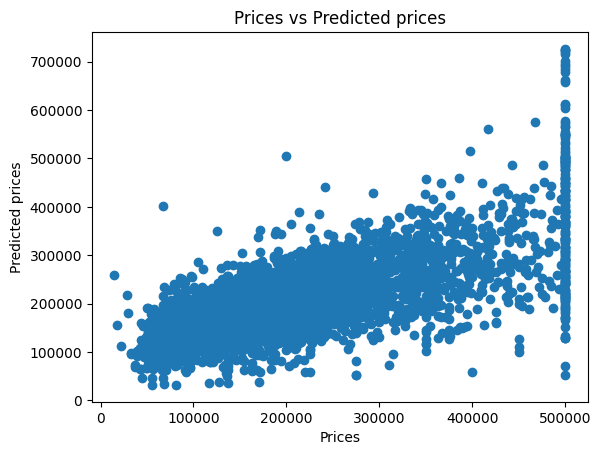

In [119]:
# Visualisasi hasil prediksi
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

**Output:**
Dari visualisasi scatter plot antara nilai aktual (`y_test`) dan nilai yang diprediksi (`y_pred`), kita dapat menggali beberapa insight:

1. **Linear Relationship:** Jika hasil scatter plot mengikuti garis diagonal dari kiri bawah ke kanan atas, ini menunjukkan bahwa model regresi linear secara umum berhasil menangkap hubungan linier antara variabel input dan variabel target. Dalam konteks ini, kita berharap bahwa seiring dengan peningkatan nilai aktual, nilai yang diprediksi juga meningkat.

2. **Underestimation atau Overestimation:** Perhatikan di mana titik-titik berada terhadap garis diagonal. Jika titik-titik berada di atas garis, ini menunjukkan bahwa model cenderung overestimasi nilai target. Sebaliknya, jika titik-titik berada di bawah garis, ini menunjukkan bahwa model cenderung underestimasi nilai target.

3. **Outliers:** Identifikasi titik-titik yang terpisah jauh dari garis diagonal. Outliers dapat memberikan wawasan tentang situasi di mana model tidak berperforma baik. Ini dapat disebabkan oleh faktor-faktor seperti data yang tidak sesuai, noise, atau pola yang tidak linier.

4. **Spread of Predictions:** Perhatikan sejauh mana titik-titik menyebar di sekitar garis diagonal. Jika terdapat penyebaran yang luas, ini dapat menunjukkan variasi yang signifikan dalam prediksi model. Sebaliknya, jika titik-titik cenderung berdekatan dengan garis diagonal, model cenderung memberikan prediksi yang konsisten.

Dengan memahami visualisasi ini, kita dapat mendapatkan wawasan tambahan tentang seberapa baik model kita dapat memodelkan dan memprediksi nilai target.

# **DATA VISUALIZATION**
Data visualization (visualisasi data) adalah proses representasi data dalam bentuk visual, seperti grafik, diagram, peta, atau plot, agar informasi dari data tersebut dapat lebih mudah dipahami dan diinterpretasikan. Tujuan dari data visualization adalah untuk menyampaikan wawasan yang terkandung dalam data dengan cara yang jelas dan efektif.

**`Prompt chat GPT: `**

"berikan code untuk membuat matriks korelasi (correlation matrix) dan menampilkan visualisasi matriks korelasi menggunakan heatmap sesuai dataframe sebelumnya"


In [120]:
# Matriks korelasi
correlation_matrix = housing.corr()

<ipython-input-120-981660b2807f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing.corr()


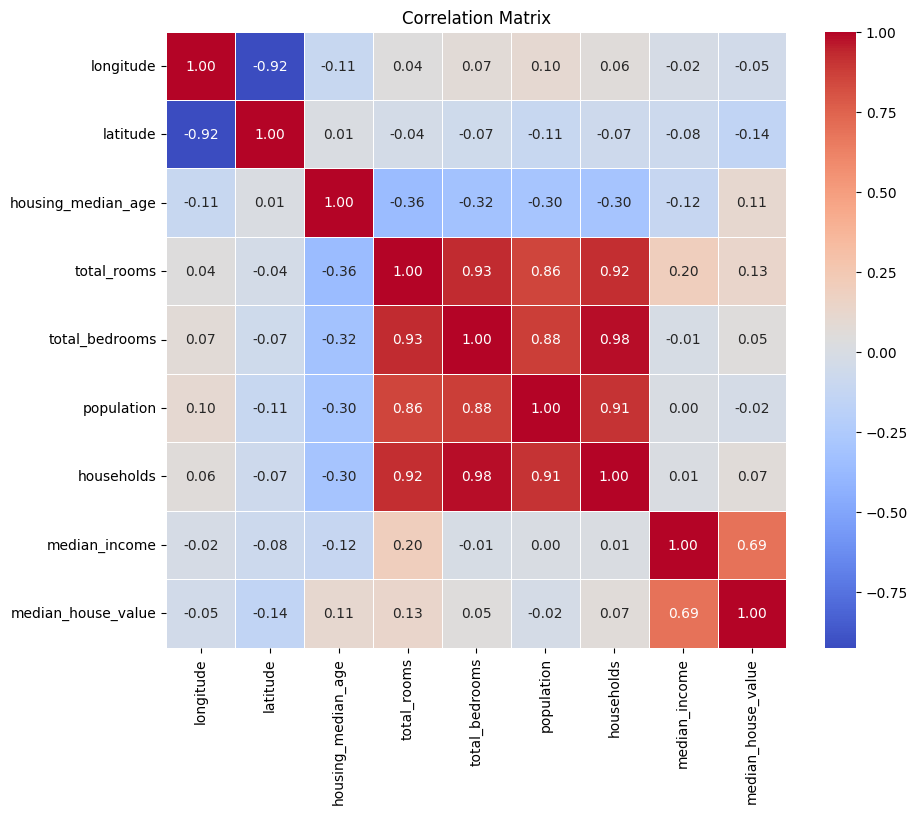

In [121]:
# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

**Output:**
1. **Nilai Korelasi:**
   - Nilai korelasi berkisar antara -1 hingga 1. Korelasi positif mendekati 1, sedangkan korelasi negatif mendekati -1. Nilai 0 menunjukkan tidak adanya korelasi.
   - Heatmap menunjukkan intensitas warna yang sesuai dengan nilai korelasi. Warna lebih terang (misalnya, warna merah pada cmap "coolwarm") menunjukkan korelasi positif, sedangkan warna lebih gelap menunjukkan korelasi negatif.

2. **Korelasi antar Variabel:**
   - Variabel dengan korelasi positif yang tinggi cenderung bergerak seiringan satu sama lain. Sebaliknya, korelasi negatif tinggi menunjukkan bahwa kedua variabel cenderung bergerak berlawanan arah.
   - Anda dapat melihat variabel mana yang memiliki hubungan yang lebih kuat dengan variabel lain berdasarkan nilai korelasi yang lebih tinggi.

3. **Pola Korelasi:**
   - Pola dalam heatmap dapat membantu mengidentifikasi grup variabel yang saling terkait. Variabel yang memiliki korelasi tinggi dapat dikelompokkan bersama-sama, dan ini dapat memberikan wawasan tentang bagaimana variabel-variabel tersebut berinteraksi.

Dengan memperhatikan matriks korelasi dan heatmap, Anda dapat memahami struktur hubungan antar variabel dalam dataset.

**Prompt Chat GPT**

berikan code untuk mengidentifikasi dan memvisualisasikan fitur yang memiliki korelasi tinggi dengan target variable (median_house_value) dengan dataframe diatas

In [122]:
# Korelasi dengan target variable
correlation_with_target = correlation_matrix['median_house_value'].sort_values(ascending=False)

In [123]:
# Pilih fitur dengan korelasi tinggi (misalnya, yang memiliki korelasi > 0.5)
high_correlation_features = correlation_with_target[correlation_with_target.abs() > 0.5].index

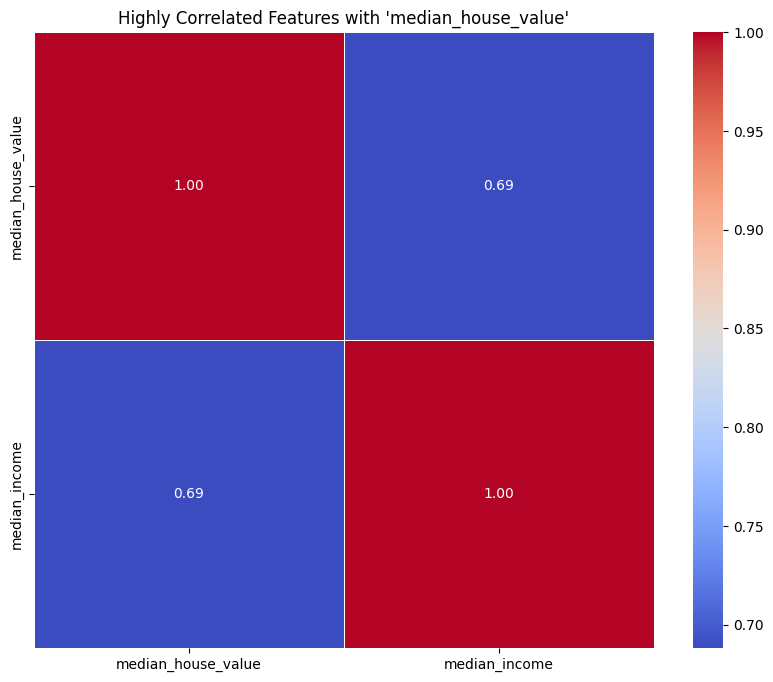

In [124]:
# Visualisasi korelasi tinggi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing[high_correlation_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Highly Correlated Features with 'median_house_value'")
plt.show()


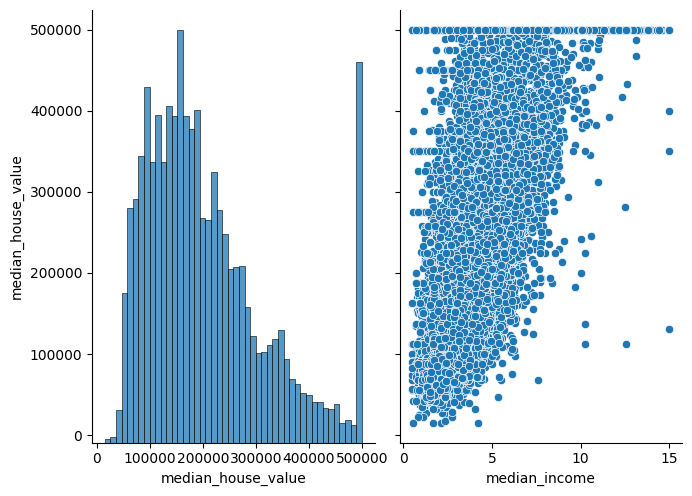

In [125]:
# Visualisasi scatter plot untuk fitur yang memiliki korelasi tinggi
sns.pairplot(housing, x_vars=high_correlation_features, y_vars='median_house_value', height=5, aspect=0.7)
plt.show()

**Output:**
1. **Total Rooms vs. Median House Value:**
   - Scatter plot ini menunjukkan bagaimana variabel 'total_rooms' berkorelasi dengan 'median_house_value'.
   - Jika terdapat pola linier yang menaik, ini menunjukkan bahwa jumlah kamar secara positif berkorelasi dengan harga rumah.
   - Outliers atau anomali pada plot dapat memberikan informasi tambahan tentang properti dengan karakteristik khusus.

2. **Median Income vs. Median House Value:**
   - Scatter plot ini memperlihatkan hubungan antara 'median_income' dan 'median_house_value'.
   - Jika terdapat pola linier yang menaik, ini menunjukkan bahwa pendapatan median suatu daerah berkorelasi positif dengan harga rumah.
   - Perhatikan apakah ada kelompok tertentu di sepanjang sumbu x yang menunjukkan kelompok pendapatan yang mungkin memiliki dampak signifikan pada harga rumah.

3. **Interaksi antara Fitur:**
   - Jika kedua fitur dipilih karena adanya asumsi interaksi atau keterkaitan, perhatikan pola scatter plot untuk melihat bagaimana interaksi kedua fitur tersebut memengaruhi 'median_house_value'.
   - Misalnya, apakah ada pola yang menarik ketika kedua fitur tersebut diplot bersamaan?

4. **Outliers dan Anomali:**
   - Perhatikan apakah ada outliers atau anomali pada scatter plot yang mungkin perlu dianalisis lebih lanjut.
   - Outliers dapat memberikan informasi penting tentang kondisi spesifik atau kesalahan dalam data.


**prompt chat GPT**

berikan code untuk membuat diagram batang (bar plot) yang menunjukkan hubungan antara variabel "housing_median_age" dan variabel "median_house_value" pada dataframe diatas

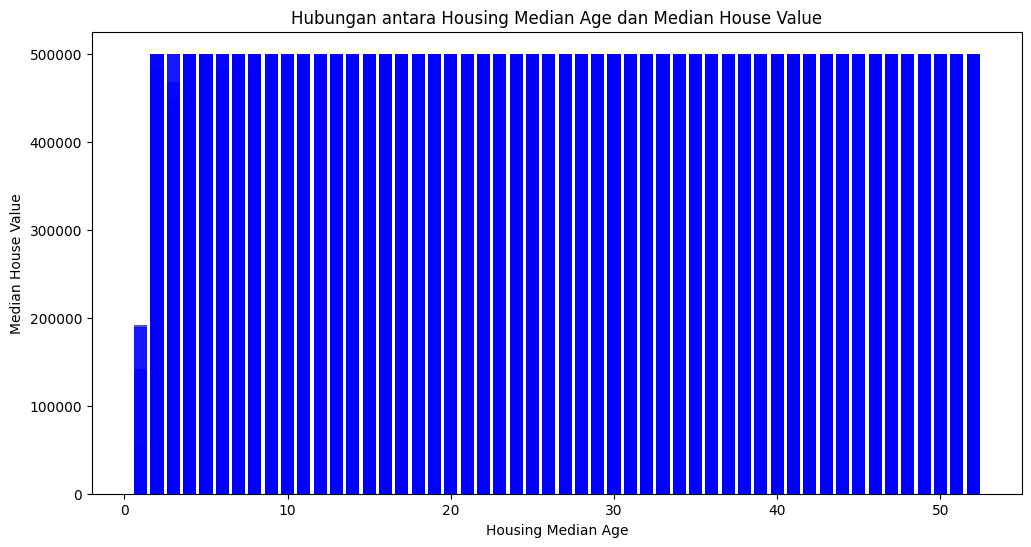

In [126]:
# Buat bar plot
plt.figure(figsize=(12, 6))
plt.bar(housing['housing_median_age'], housing['median_house_value'], color='blue', alpha=0.7)
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.title('Hubungan antara Housing Median Age dan Median House Value')
plt.show()

**prompt chat gpt**

berikan code untuk membuat pair plot (scatter plot matrix) dari beberapa variabel pada dataframe diatas

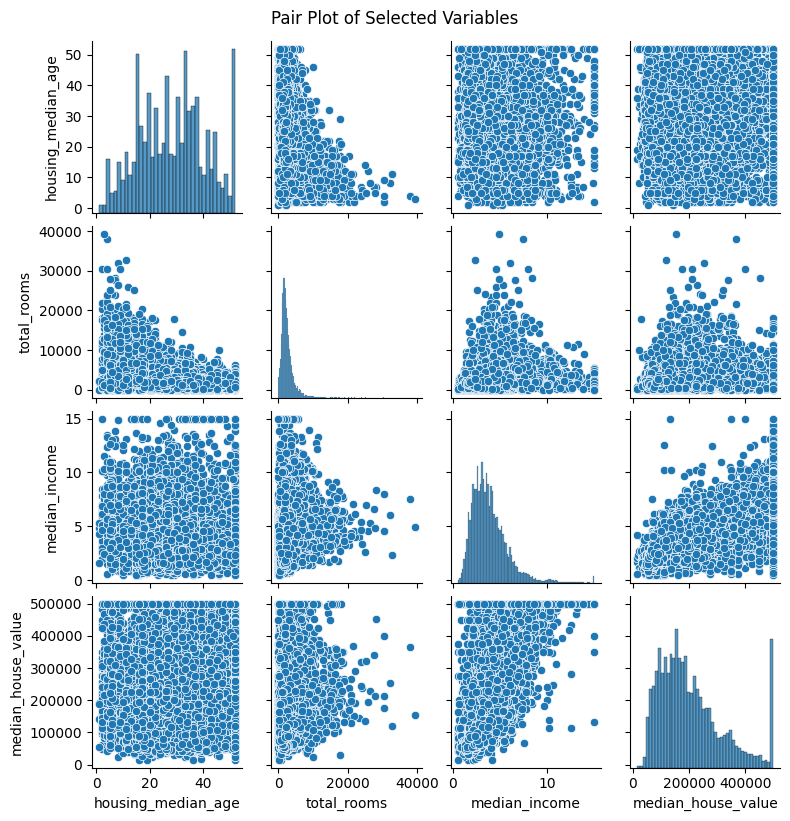

In [127]:
# Pilih variabel yang ingin ditampilkan dalam pair plot
selected_variables = ['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']
# Buat pair plot
sns.pairplot(housing[selected_variables], height=2)
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

**Output:**
Pair plot adalah alat visualisasi yang berguna untuk mengeksplorasi hubungan antara berbagai variabel dalam sebuah dataset. Di bawah ini adalah beberapa insight yang mungkin dapat diperoleh dari pair plot dengan variabel yang telah Anda pilih:

1. **Hubungan Linier Positif:**
   - Jika scatter plot antara dua variabel menunjukkan tren linier positif (data bergerak naik seiring pertambahan nilai variabel), ini menunjukkan adanya korelasi positif antara kedua variabel tersebut.

2. **Distribusi Variabel:**
   - Dari diagonal pair plot, kita dapat melihat distribusi setiap variabel secara individual. Apakah variabel tersebut memiliki distribusi normal, skewed, atau mungkin memiliki beberapa pencilan (outliers).

3. **Korelasi Antar Variabel:**
   - Dengan melihat scatter plot dan koefisien korelasi, kita dapat mengevaluasi sejauh mana variabel-variabel tertentu berkorelasi satu sama lain. Korelasi dapat menjadi positif, negatif, atau mendekati nol.

4. **Outliers:**
   - Pada scatter plot, kita dapat mengidentifikasi adanya outliers, yaitu titik-titik yang berada jauh dari pola umum data. Pencilan ini dapat memengaruhi kinerja model dan perlu dipertimbangkan dalam analisis.

5. **Distribusi Variabel Target:**
   - Jika variabel target adalah 'median_house_value', kita dapat melihat distribusinya dan menilai apakah terdapat tren atau pola khusus dalam hubungannya dengan variabel input lainnya.

# **Training**
Training menggunakan regresi linear adalah proses di mana model regresi linear belajar dari data untuk menyesuaikan parameter-parameter (koefisien dan intercept) sehingga dapat memodelkan hubungan linier antara variabel input dan variabel target. Dalam konteks regresi linear, model mencoba mempelajari garis atau permukaan linear yang paling baik mewakili pola dalam data.

**Promt chat gpt**

berikan code training untuk menyesuaikan parameter-parameter (koefisien dan intercept) sehingga dapat memodelkan hubungan linier antara variabel input dan variabel target dengan dataframe diatas


In [128]:
# Pisahkan fitur dan target variable
X = housing[['housing_median_age', 'total_rooms', 'median_income']]
y = housing['median_house_value']

# Pisahkan data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model menggunakan data training
model.fit(X_train, y_train)

# Dapatkan koefisien (slope/gradient) dan intercept
slope = model.coef_
intercept = model.intercept_

# Prediksi nilai target pada data test
y_pred = model.predict(X_test)

In [129]:
# Evaluasi model dengan mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6563178660.010065


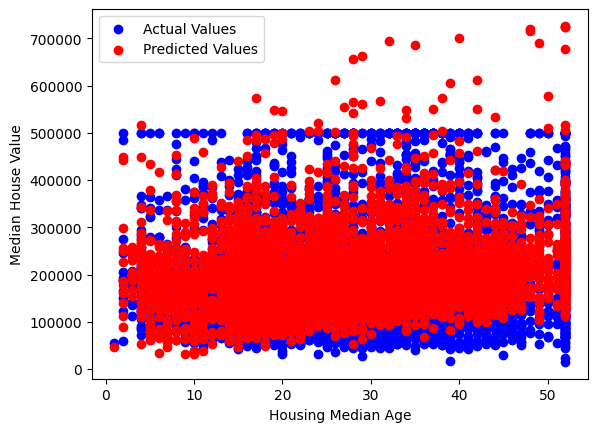

In [130]:
# Visualisasi hasil prediksi
plt.scatter(X_test['housing_median_age'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['housing_median_age'], y_pred, color='red', label='Predicted Values')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

**prompt chat gpt**
berikan code untuk train dataset dengan regression linear dan tampilkan visualisasinya dengan semua Target kecuali median_house_value

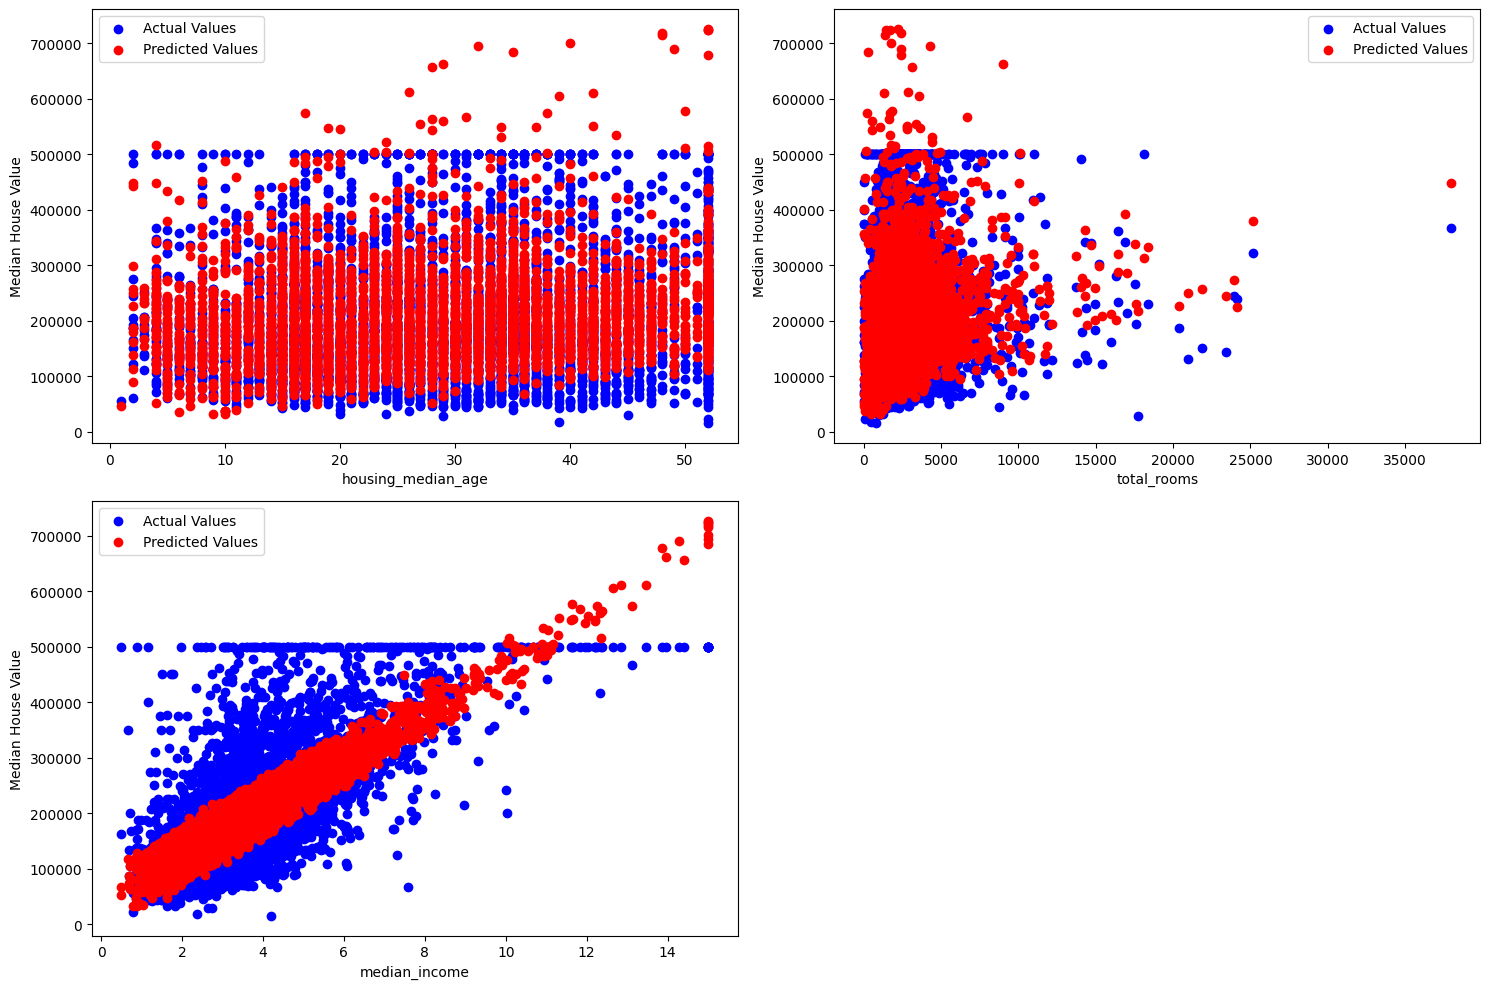

In [131]:
# Visualisasi hasil prediksi untuk semua variabel target kecuali median_house_value
target_variables = ['housing_median_age', 'total_rooms', 'median_income']  # Ganti dengan variabel target yang diinginkan

plt.figure(figsize=(15, 10))

for i, target_variable in enumerate(target_variables, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_test[target_variable], y_test, color='blue', label='Actual Values')
    plt.scatter(X_test[target_variable], y_pred, color='red', label='Predicted Values')
    plt.xlabel(target_variable)
    plt.ylabel('Median House Value')
    plt.legend()

plt.tight_layout()
plt.show()

**Output:**
1. **housing_median_age:**
   - **Blue Points (Actual Values):** Mewakili nilai aktual dari variabel 'housing_median_age' pada data uji.
   - **Red Points (Predicted Values):** Mewakili nilai yang diprediksi oleh model untuk variabel 'housing_median_age' pada data uji.
   - **Insight:** Scatter plot ini membantu melihat sejauh mana model dapat memodelkan hubungan antara 'housing_median_age' dan 'median_house_value'. Jika titik merah mengikuti pola titik biru, ini menunjukkan bahwa model dengan baik menangkap hubungan antara variabel ini.

2. **total_rooms:**
   - **Blue Points (Actual Values):** Mewakili nilai aktual dari variabel 'total_rooms' pada data uji.
   - **Red Points (Predicted Values):** Mewakili nilai yang diprediksi oleh model untuk variabel 'total_rooms' pada data uji.
   - **Insight:** Scatter plot ini membantu melihat sejauh mana model dapat memodelkan hubungan antara 'total_rooms' dan 'median_house_value'. Jika pola titik merah mengikuti pola titik biru, ini menunjukkan bahwa model dengan baik menangkap hubungan antara variabel ini.

3. **median_income:**
   - **Blue Points (Actual Values):** Mewakili nilai aktual dari variabel 'median_income' pada data uji.
   - **Red Points (Predicted Values):** Mewakili nilai yang diprediksi oleh model untuk variabel 'median_income' pada data uji.
   - **Insight:** Scatter plot ini membantu melihat sejauh mana model dapat memodelkan hubungan antara 'median_income' dan 'median_house_value'. Jika pola titik merah mengikuti pola titik biru, ini menunjukkan bahwa model dengan baik menangkap hubungan antara variabel ini.

# Inputing New Data

Data baru dapat digunakan untuk mengukur seberapa baik model dapat melakukan prediksi pada situasi yang tidak pernah dilihat sebelumnya. Ini membantu dalam mengevaluasi kinerja model secara umum dan memastikan bahwa model dapat memberikan hasil yang baik pada data yang tidak terlihat selama pelatihan.

**Prompt chat GPT:**

 berikan code input data baru untuk testing

In [133]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Inisialisasi model regresi linear
model = LinearRegression()

# Data pelatihan (gantilah dengan data pelatihan sesuai)
train_data = pd.DataFrame({
    'housing_median_age': [25, 35, 30, 40],
    'total_rooms': [1200, 1800, 1500, 2000],
    'median_income': [4.0, 4.5, 3.8, 5.2],
    'median_house_value': [200000, 250000, 180000, 300000]
})

# Pisahkan fitur dan target variable
X_train = train_data[['housing_median_age', 'total_rooms', 'median_income']]
y_train = train_data['median_house_value']

# Latih model menggunakan data pelatihan
model.fit(X_train, y_train)

# Data baru untuk pengujian
new_data = pd.DataFrame({
    'housing_median_age': [30, 40, 20],
    'total_rooms': [1500, 2000, 1000],
    'median_income': [4.5, 5.0, 4.0]
})

# Lakukan prediksi dengan model yang sudah dilatih
predictions = model.predict(new_data)

# Tampilkan hasil prediksi
print("Predictions:")
for i, prediction in enumerate(predictions):
    print(f"Data {i+1}: {prediction}")



Predictions:
Data 1: 250000.00000000675
Data 2: 279999.9999999794
Data 3: 220000.00000003417


**Output:**
### Pelatihan Model:
1. **Inisialisasi Model Regresi Linear:**
   - Code: `model = LinearRegression()`
   - Insight: Mendefinisikan model regresi linear dari scikit-learn.

2. **Data Pelatihan:**
   - Code: `train_data = pd.DataFrame(...)`
   - Insight: Membuat DataFrame yang berisi data pelatihan dengan variabel 'housing_median_age', 'total_rooms', 'median_income', dan 'median_house_value'.

3. **Pisahkan Fitur dan Target Variable:**
   - Code: `X_train = train_data[['housing_median_age', 'total_rooms', 'median_income']]` dan `y_train = train_data['median_house_value']`
   - Insight: Memisahkan fitur (variabel independen) dan target variable (variabel dependen) dari data pelatihan.

4. **Latih Model:**
   - Code: `model.fit(X_train, y_train)`
   - Insight: Melatih model regresi linear menggunakan data pelatihan.

### Pengujian Model:
5. **Data Baru untuk Pengujian:**
   - Code: `new_data = pd.DataFrame(...)`
   - Insight: Membuat DataFrame yang berisi data baru untuk pengujian model.

6. **Lakukan Prediksi dengan Model yang Sudah Dilatih:**
   - Code: `predictions = model.predict(new_data)`
   - Insight: Menggunakan model yang sudah dilatih untuk melakukan prediksi pada data baru.

7. **Tampilkan Hasil Prediksi:**
   - Insight: Menampilkan hasil prediksi model untuk setiap data baru. Output ini memberikan nilai prediksi 'median_house_value' berdasarkan hubungan linier yang dipelajari oleh model dari data pelatihan.
